In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#Librerias de Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Métricas de Validación

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

In [5]:
train['SalePrice'] = pd.qcut(train['SalePrice'], 3, labels=["Low", "Mid", "High"])

In [6]:
size_mapping = {
    'Low': 0,    
    'Mid': 1, 
    'High': 2    
}
train['SalePrice'] = train['SalePrice'].map(size_mapping)

In [7]:
train[['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish']].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,GarageFinish
0,Gd,Gd,No,GLQ,RFn
1,TA,Gd,Gd,ALQ,RFn
2,Gd,Gd,Mn,GLQ,RFn
3,TA,TA,No,ALQ,Unf
4,Gd,Gd,Av,GLQ,RFn


In [8]:
X = train.drop(columns=["SalePrice"])

In [9]:
# X.drop(columns=["Id"],inplace=True)

In [10]:
y = train["SalePrice"]

In [11]:
X.fillna(0, inplace=True) 
X = pd.get_dummies(X)


In [12]:
X = np.array(X)
y = np.array(y)

# Modelo 1

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [14]:
from keras.layers import Dropout, BatchNormalization, Dense, Activation
from keras.models import Sequential
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from sklearn.metrics import confusion_matrix

model.fit(X_train, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=1)

# Predicciones
preds = model.predict(X_test)
preds_classes = np.argmax(preds, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_test, preds_classes)
print(cm)


Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.4016 - loss: 1.5588 - val_accuracy: 0.5983 - val_loss: 0.9301
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6463 - loss: 0.9528 - val_accuracy: 0.5983 - val_loss: 0.8572
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6674 - loss: 0.9055 - val_accuracy: 0.6325 - val_loss: 0.8195
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6845 - loss: 0.8487 - val_accuracy: 0.6752 - val_loss: 0.7917
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7517 - loss: 0.6622 - val_accuracy: 0.6923 - val_loss: 0.7718
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7616 - loss: 0.6290 - val_accuracy: 0.6709 - val_loss: 0.7476
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7285 - loss: 0.6280 - val_accuracy: 0.6752 - val_loss: 0.7221
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7659 - loss: 0.5867 - val_accuracy: 0.6795 - val_loss

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_classes))


              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.71      0.69      0.70       101
           2       0.88      0.79      0.83        97

    accuracy                           0.79       292
   macro avg       0.79      0.79      0.79       292
weighted avg       0.79      0.79      0.79       292



<Axes: >

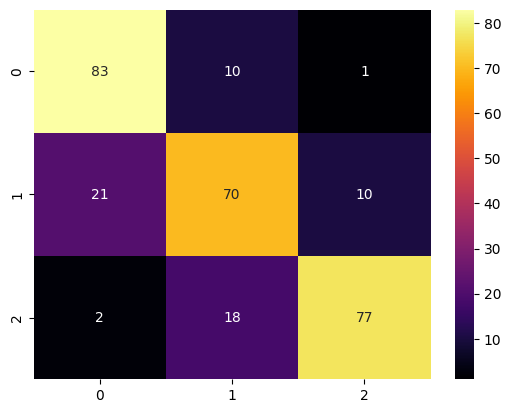

In [17]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap="inferno")

# Modelo 2

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [19]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))  # Cambio para clasificación multiclase
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [20]:


model.fit(X_train, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=1)

# Predicciones
preds = model.predict(X_test)
preds_classes = np.argmax(preds, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_test, preds_classes)
print(cm)


Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.3667 - loss: 1.9183 - val_accuracy: 0.5940 - val_loss: 0.9800
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5075 - loss: 1.2629 - val_accuracy: 0.5598 - val_loss: 0.9286
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5902 - loss: 1.0137 - val_accuracy: 0.5085 - val_loss: 0.9060
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6384 - loss: 0.9444 - val_accuracy: 0.5000 - val_loss: 0.8918
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6543 - loss: 0.8611 - val_accuracy: 0.5299 - val_loss: 0.8823
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6520 - loss: 0.8900 - val_accuracy: 0.5427 - val_loss: 0.8744
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6655 - loss: 0.8365 - val_accuracy: 0.5385 - val_loss: 0.8687
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6733 - loss: 0.7824 - val_accuracy: 0.5556 - val_loss

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_classes))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85        94
           1       0.75      0.74      0.75       101
           2       0.85      0.88      0.86        97

    accuracy                           0.82       292
   macro avg       0.82      0.82      0.82       292
weighted avg       0.82      0.82      0.82       292



<Axes: >

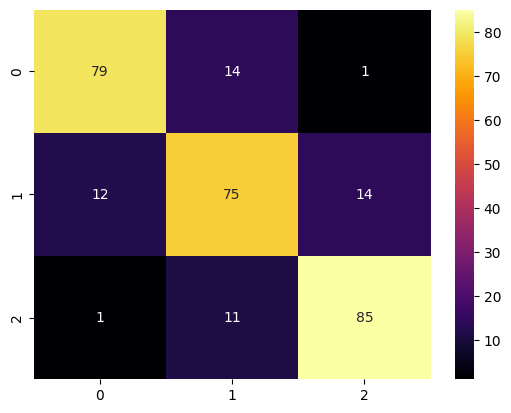

In [22]:
sns.heatmap(cm,annot=True,cmap="inferno")

## Comparar los resultados obtenidos con los diferentes modelos de clasificación

## Modelo 1

In [25]:
from keras.layers import Dropout, BatchNormalization, Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam

In [33]:
model1 = Sequential()
model1.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(3, activation='softmax')) 
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=1)
print(history1)


c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.3944 - loss: 1.7854 - val_accuracy: 0.4829 - val_loss: 0.9439
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6419 - loss: 1.0516 - val_accuracy: 0.6026 - val_loss: 0.8476
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6998 - loss: 0.8990 - val_accuracy: 0.6709 - val_loss: 0.7944
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7166 - loss: 0.7348 - val_accuracy: 0.6538 - val_loss: 0.7686
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6864 - loss: 0.8808 - val_accuracy: 0.6154 - val_loss: 0.7675
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6767 - loss: 0.7507 - val_accuracy: 0.6154 - val_loss: 0.7594
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7465 - loss: 0.6360 - val_accuracy: 0.6111 - val_loss: 0.7522
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7452 - loss: 0.6507 - val_accuracy: 0.5940 - val_los

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Modelo 1 - Matriz de Confusión:
[[79 14  1]
 [16 74 11]
 [ 0  7 90]]
Modelo 1 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        94
           1       0.78      0.73      0.76       101
           2       0.88      0.93      0.90        97

    accuracy                           0.83       292
   macro avg       0.83      0.83      0.83       292
weighted avg       0.83      0.83      0.83       292



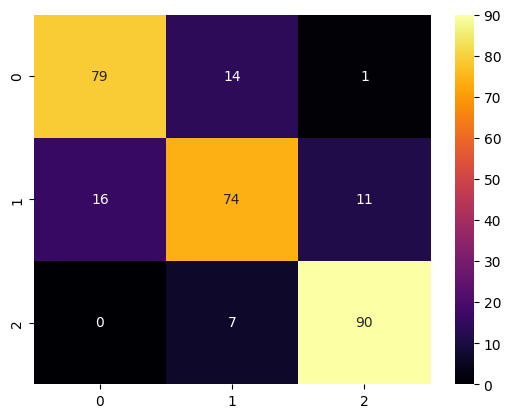

In [34]:
preds1 = model1.predict(X_test)
preds_classes1 = np.argmax(preds1, axis=1)

# Matriz de Confusión y Clasificación Reporte
cm1 = confusion_matrix(y_test, preds_classes1)
print("Modelo 1 - Matriz de Confusión:")
print(cm1)
print("Modelo 1 - Reporte de Clasificación:")
print(classification_report(y_test, preds_classes1))

# Visualización de la Matriz de Confusión
sns.heatmap(cm1, annot=True, cmap="inferno")
plt.show()

## Modelo 2:

In [27]:
from keras.layers import LeakyReLU

In [28]:
model2 = Sequential()
model2.add(Dense(512, input_shape=(X_train.shape[1],)))
model2.add(LeakyReLU(alpha=0.05))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(256))
model2.add(LeakyReLU(alpha=0.05))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(128))
model2.add(LeakyReLU(alpha=0.05))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(64))
model2.add(LeakyReLU(alpha=0.05))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax'))  
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=1)

c:\Users\jenni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.3740 - loss: 1.9167 - val_accuracy: 0.6111 - val_loss: 1.0167
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4869 - loss: 1.4628 - val_accuracy: 0.7222 - val_loss: 0.9472
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5602 - loss: 1.1636 - val_accuracy: 0.6923 - val_loss: 0.8962
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5907 - loss: 1.0326 - val_accuracy: 0.7051 - val_loss: 0.8514
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6349 - loss: 0.9328 - val_accuracy: 0.7265 - val_loss: 0.8137
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6658 - loss: 0.8812 - val_accuracy: 0.7137 - val_loss: 0.7832
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6549 - loss: 0.8420 - val_accuracy: 0.7009 - val_loss: 0.7535
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6756 - loss: 0.7969 - val_accuracy: 0.6880 - val_loss

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Modelo 2 - Matriz de Confusión:
[[83  9  2]
 [14 74 13]
 [ 0 13 84]]
Modelo 2 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        94
           1       0.77      0.73      0.75       101
           2       0.85      0.87      0.86        97

    accuracy                           0.83       292
   macro avg       0.82      0.83      0.83       292
weighted avg       0.82      0.83      0.82       292



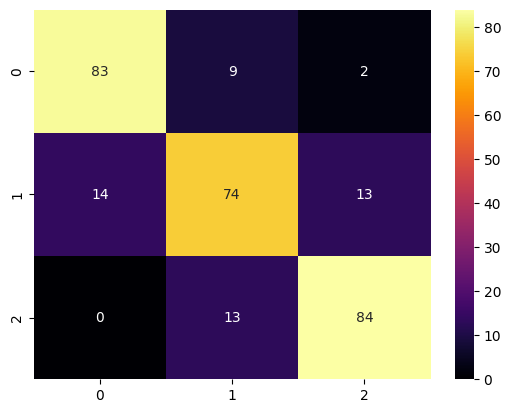

In [35]:
# Predicciones
preds2 = model2.predict(X_test)
preds_classes2 = np.argmax(preds2, axis=1)

# Matriz de Confusión y Clasificación Reporte
cm2 = confusion_matrix(y_test, preds_classes2)
print("Modelo 2 - Matriz de Confusión:")
print(cm2)
print("Modelo 2 - Reporte de Clasificación:")
print(classification_report(y_test, preds_classes2))

# Visualización de la Matriz de Confusión
sns.heatmap(cm2, annot=True, cmap="inferno")
plt.show()

## Modelos de regresión

### Modelo de Regresión 1

In [29]:
model_reg1 = Sequential()
model_reg1.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_reg1.add(Dense(64, activation='relu'))
model_reg1.add(Dense(32, activation='relu'))
model_reg1.add(Dense(1))

model_reg1.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg1 = model_reg1.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5475 - mae: 0.5872 - val_loss: 0.2155 - val_mae: 0.3599
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1682 - mae: 0.3164 - val_loss: 0.2025 - val_mae: 0.3375
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1343 - mae: 0.2784 - val_loss: 0.1962 - val_mae: 0.3329
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1172 - mae: 0.2631 - val_loss: 0.1883 - val_mae: 0.3263
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0945 - mae: 0.2309 - val_loss: 0.1869 - val_mae: 0.3203
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0752 - mae: 0.2064 - val_loss: 0.1820 - val_mae: 0.3102
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0639 - mae: 0.1851 - val_loss: 0.1635 - val_mae: 0.2947
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0695 - mae: 0.1984 - val_loss: 0.1647 - val_mae: 0.2986
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.05

### Modelo de regresión 2:

In [30]:
model_reg2 = Sequential()
model_reg2.add(Dense(256, input_shape=(X_train.shape[1],), activation='tanh'))
model_reg2.add(Dense(128, activation='tanh'))
model_reg2.add(Dense(64, activation='tanh'))
model_reg2.add(Dense(1))

model_reg2.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg2 = model_reg2.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 1.0482 - mae: 0.7767 - val_loss: 0.2379 - val_mae: 0.3829
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1910 - mae: 0.3376 - val_loss: 0.2143 - val_mae: 0.3640
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1646 - mae: 0.3171 - val_loss: 0.1928 - val_mae: 0.3356
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1195 - mae: 0.2693 - val_loss: 0.1782 - val_mae: 0.3361
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1152 - mae: 0.2676 - val_loss: 0.2015 - val_mae: 0.3524
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1025 - mae: 0.2433 - val_loss: 0.1844 - val_mae: 0.3363
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0878 - mae: 0.2280 - val_loss: 0.1849 - val_mae: 0.3319
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0866 - mae: 0.2224 - val_loss: 0.1704 - val_mae: 0.3103
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.06

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Predicciones Modelo 1
preds_reg1 = model_reg1.predict(X_test)
mae_reg1 = mean_absolute_error(y_test, preds_reg1)
mse_reg1 = mean_squared_error(y_test, preds_reg1)
r2_reg1 = r2_score(y_test, preds_reg1)

# Predicciones Modelo 2
preds_reg2 = model_reg2.predict(X_test)
mae_reg2 = mean_absolute_error(y_test, preds_reg2)
mse_reg2 = mean_squared_error(y_test, preds_reg2)
r2_reg2 = r2_score(y_test, preds_reg2)

print(f"Modelo de Regresión 1 - MAE: {mae_reg1}, MSE: {mse_reg1}, R2: {r2_reg1}")
print(f"Modelo de Regresión 2 - MAE: {mae_reg2}, MSE: {mse_reg2}, R2: {r2_reg2}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Modelo de Regresión 1 - MAE: 0.27179666713186323, MSE: 0.15942279250356023, R2: 0.7562357660092972
Modelo de Regresión 2 - MAE: 0.3024786620477393, MSE: 0.19008073007129372, R2: 0.7093584748166564
